In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier

## The prediction task is to predict the Price of the houses given the features. The meaning of the output variable is cost of the houses.

In [2]:
housingdata = pd.read_csv('housing_dataset.csv')
housingdata.head()

House ID      City  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
0         0   Chicago             742.0                4               2   
1         1    Denver             896.0                4               4   
2         2   Chicago             996.0                3               2   
3         3   Seattle             750.0                4               2   
4         4  New York             742.0                4               1   

   Stories Renovation Status  Price ($)  
0        3         furnished    1330000  
1        4         furnished    1225000  
2        2    semi-furnished    1225000  
3        2         furnished    1221500  
4        2         furnished    1141000

In [3]:
print(housingdata.dtypes)

House ID               int64
City                  object
House Area (sqm)     float64
No. of Bedrooms        int64
No. of Toilets         int64
Stories                int64
Renovation Status     object
Price ($)              int64
dtype: object


<AxesSubplot:>

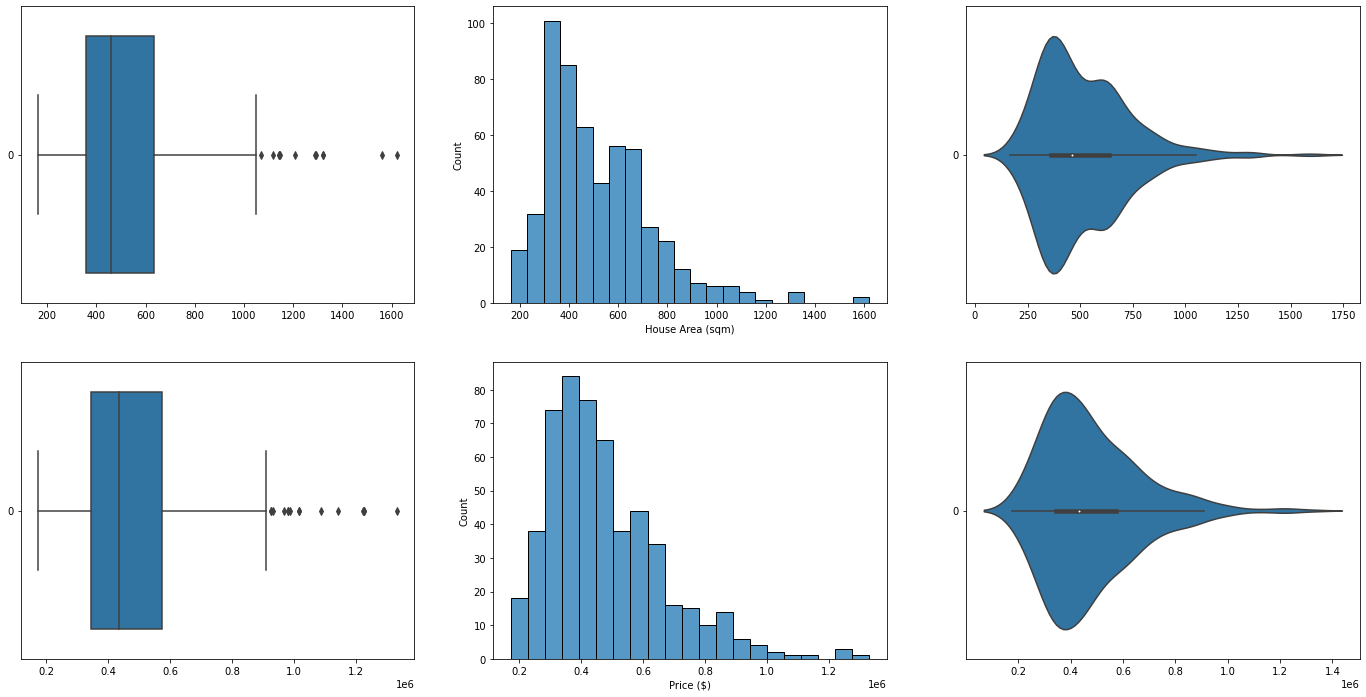

In [4]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(data = housingdata['House Area (sqm)'], orient = "h", ax = axes[0,0])
sb.histplot(data = housingdata['House Area (sqm)'], ax = axes[0,1])
sb.violinplot(data = housingdata['House Area (sqm)'], orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(data = housingdata['Price ($)'], orient = "h", ax = axes[1,0])
sb.histplot(data = housingdata['Price ($)'], ax = axes[1,1])
sb.violinplot(data = housingdata['Price ($)'], orient = "h", ax = axes[1,2])

In [5]:
housingdata.corr()

House ID  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
House ID          1.000000         -0.541468        -0.371096       -0.467336   
House Area (sqm) -0.541468          1.000000         0.151858        0.193820   
No. of Bedrooms  -0.371096          0.151858         1.000000        0.373930   
No. of Toilets   -0.467336          0.193820         0.373930        1.000000   
Stories          -0.413518          0.083996         0.408564        0.326165   
Price ($)        -0.929878          0.535997         0.366494        0.517545   

                   Stories  Price ($)  
House ID         -0.413518  -0.929878  
House Area (sqm)  0.083996   0.535997  
No. of Bedrooms   0.408564   0.366494  
No. of Toilets    0.326165   0.517545  
Stories           1.000000   0.420712  
Price ($)         0.420712   1.000000

In [6]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [7]:
housingdata.describe()

House ID  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
count  545.00000        545.000000       545.000000      545.000000   
mean   272.00000        515.054128         2.965138        1.286239   
std    157.47222        217.014102         0.738064        0.502470   
min      0.00000        165.000000         1.000000        1.000000   
25%    136.00000        360.000000         2.000000        1.000000   
50%    272.00000        460.000000         3.000000        1.000000   
75%    408.00000        636.000000         3.000000        2.000000   
max    544.00000       1620.000000         6.000000        4.000000   

          Stories     Price ($)  
count  545.000000  5.450000e+02  
mean     1.805505  4.766729e+05  
std      0.867492  1.870440e+05  
min      1.000000  1.750000e+05  
25%      1.000000  3.430000e+05  
50%      2.000000  4.340000e+05  
75%      2.000000  5.740000e+05  
max      4.000000  1.330000e+06

### Note that there are greater than two unique values, which make them suitable as category. The features will then be represented as category datatype.

In [8]:
print(pd.unique(housingdata['No. of Bedrooms']))
print(pd.unique(housingdata['No. of Toilets']))
print(pd.unique(housingdata['Stories']))
print(pd.unique(housingdata['Renovation Status']))

[4 3 5 2 6 1]
[2 4 1 3]
[3 4 2 1]
['furnished' 'semi-furnished' 'unfurnished']


## I have selected linear regression as both the price and House Area are more numeric.
## Conclusion, the linear regression may run into a problem called overfitting

## Letting House Area (sqm) to be predictor

Intercept of Regression 	: b =  [231904.22580856]
Coefficients of Regression 	: a =  [[476.21051132]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3120449631128862
Mean Squared Error (MSE) 	: 24910162413.503677
mean_absolute_percentage_error: 0.2599642907127873

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1976606110829111
Mean Squared Error (MSE) 	: 24863354214.132687
mean_absolute_percentage_error: 0.28419152864890646



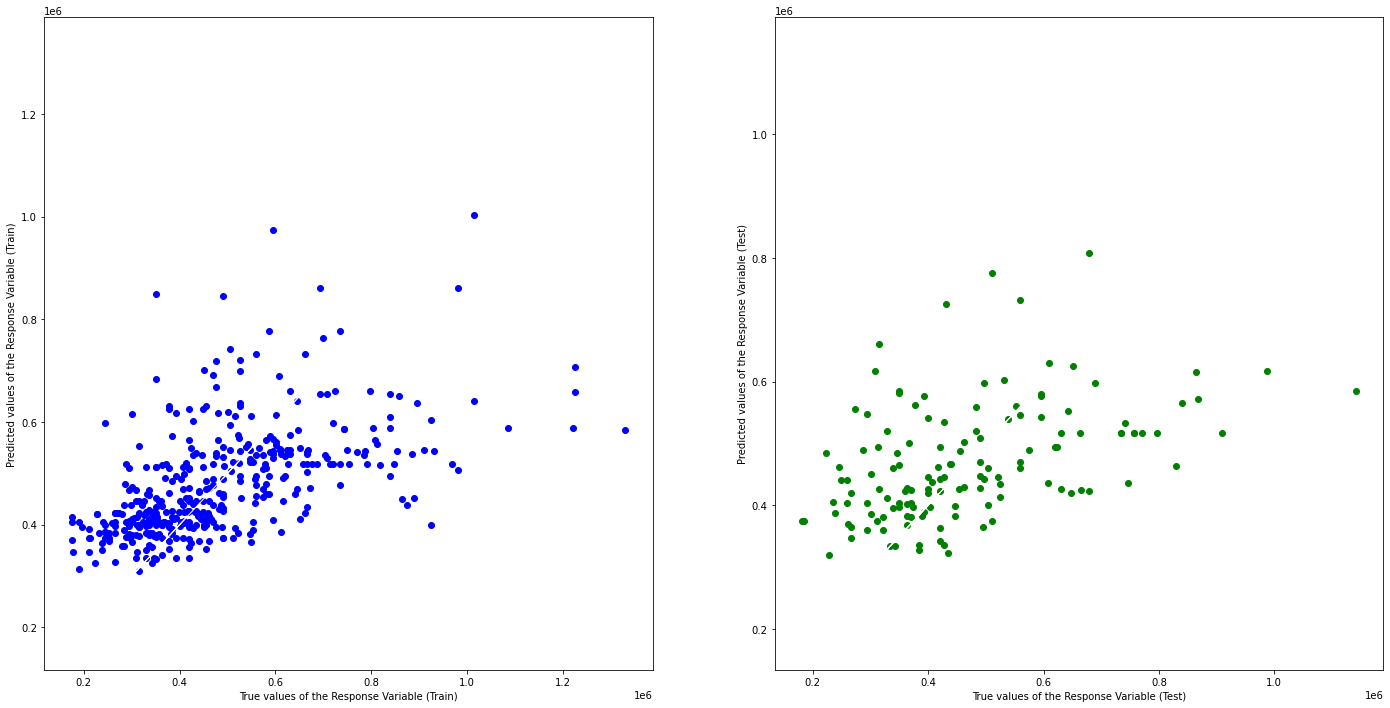

In [9]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


# We will now let House Area (sqm) to be a predictor, while Price ($) to be response
response = pd.DataFrame(housingdata['Price ($)'])   # Response
predictor = pd.DataFrame(housingdata['House Area (sqm)']) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
mean_ap = mean_absolute_percentage_error(y_train, y_train_pred)
print('mean_absolute_percentage_error:', mean_ap)
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
mean_ap = mean_absolute_percentage_error(y_test, y_test_pred)
print('mean_absolute_percentage_error:', mean_ap)
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Right now we compare the linear regression to baseline, and the linear regression model MSE is lower, hence it is accurate as compared to a dummy baseline

In [10]:
from sklearn.dummy import DummyRegressor

baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
linear_regression_predictions = linear_regression_model.predict(X_test)

baseline_mse = mean_squared_error(y_test, baseline_predictions)

linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)

print("Baseline Model MSE:", baseline_mse)
print("Linear Regression Model MSE:", linear_regression_mse)

Baseline Model MSE: 31118988747.237556
Linear Regression Model MSE: 24863354214.132687


## Letting 'No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status' be predictors of price

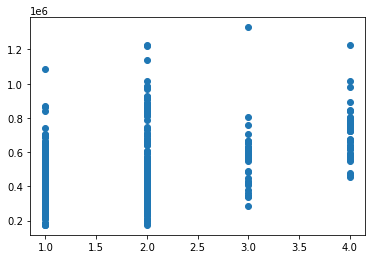

In [11]:
plt.scatter(housingdata['Stories'], housingdata['Price ($)']) #Note that it is not accurate to perform linear regression with categorical variable

## In an attempt to predict Price using Stories, the mean_absolute_percentage error is high, therefore we will be using logisitc regression instead.

## Also, I have chosen logistic regression as all the variables used will be categorical.

In [12]:
# Separate the target variable from the features
X = housingdata['No. of Bedrooms'].values.reshape(-1, 1)  # Ordered independent variable
y = housingdata['Price ($)']  # Numeric target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

mean_ap = mean_absolute_percentage_error(y_test, y_pred)
print('mean_absolute_percentage_error:', mean_ap)


Root Mean Squared Error: 212285.32566011732
R-squared Score: 0.10842945504461832
mean_absolute_percentage_error: 0.3610478258522402


## Now we need to clean the data again to change the variables into category data type.

In [13]:
category_variables = ['No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status']
#for category in category_variables:
#    housingdata[category] = housingdata[category].astype('category')
#housingdata.dtypes

In [14]:
list_of_furnishing = ['furnished', 'semi-furnished', 'unfurnished']
list_of_furnishing_cat = [3, 2, 1]
for i in range(3):
    
    housingdata['Renovation Status'] = housingdata['Renovation Status'].replace([list_of_furnishing[i]],list_of_furnishing_cat[i])

## Lets now convert our target variable which is Price into a categorical variable, and perform the same logistic regression, since logistic regression is better when the targer variable is categorical.

In [15]:
housingdata.describe()

House ID  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
count  545.00000        545.000000       545.000000      545.000000   
mean   272.00000        515.054128         2.965138        1.286239   
std    157.47222        217.014102         0.738064        0.502470   
min      0.00000        165.000000         1.000000        1.000000   
25%    136.00000        360.000000         2.000000        1.000000   
50%    272.00000        460.000000         3.000000        1.000000   
75%    408.00000        636.000000         3.000000        2.000000   
max    544.00000       1620.000000         6.000000        4.000000   

          Stories  Renovation Status     Price ($)  
count  545.000000         545.000000  5.450000e+02  
mean     1.805505           1.930275  4.766729e+05  
std      0.867492           0.761373  1.870440e+05  
min      1.000000           1.000000  1.750000e+05  
25%      1.000000           1.000000  3.430000e+05  
50%      2.000000           2.000000  4.340000e+05  
75%      2.000000           3.000000  5.740000e+05  
max      4.000000           3.000000  1.330000e+06

In [16]:
housingdata_copy2 = housingdata.copy()

for i in range(545):
    if housingdata['Price ($)'][i] <= 200000:
        housingdata_copy2['Price ($)'][i] = 1
    
    if 200000 < housingdata['Price ($)'][i] <= 300000:
        housingdata_copy2['Price ($)'][i] = 2
        
    if 300000 < housingdata['Price ($)'][i] <= 400000:
        housingdata_copy2['Price ($)'][i] = 3
    
    if 400000 < housingdata['Price ($)'][i] <= 500000:
        housingdata_copy2['Price ($)'][i] = 4
    
    if housingdata['Price ($)'][i] > 500000:
        housingdata_copy2['Price ($)'][i] = 5

<ipython-input-16-5433f1b55737>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_copy2['Price ($)'][i] = 5
<ipython-input-16-5433f1b55737>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_copy2['Price ($)'][i] = 4
<ipython-input-16-5433f1b55737>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingdata_copy2['Price ($)'][i] = 3
<ipython-input-16-5433f1b55737>:8: SettingWithCopyWarning: 
A value is trying t

In [17]:
housingdata_copy2

House ID      City  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
0           0   Chicago             742.0                4               2   
1           1    Denver             896.0                4               4   
2           2   Chicago             996.0                3               2   
3           3   Seattle             750.0                4               2   
4           4  New York             742.0                4               1   
..        ...       ...               ...              ...             ...   
540       540   Seattle             300.0                2               1   
541       541  New York             240.0                3               1   
542       542    Boston             362.0                2               1   
543       543   Seattle             291.0                3               1   
544       544   Chicago             385.0                3               1   

     Stories  Renovation Status  Price ($)  
0          3                  3          5  
1          4                  3          5  
2          2                  2          5  
3          2                  3          5  
4          2                  3          5  
..       ...                ...        ...  
540        1                  1          1  
541        1                  2          1  
542        1                  1          1  
543        1                  3          1  
544        2                  1          1  

[545 rows x 8 columns]

In [18]:
housingdata_copy2.describe()

House ID  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
count  545.00000        545.000000       545.000000      545.000000   
mean   272.00000        515.054128         2.965138        1.286239   
std    157.47222        217.014102         0.738064        0.502470   
min      0.00000        165.000000         1.000000        1.000000   
25%    136.00000        360.000000         2.000000        1.000000   
50%    272.00000        460.000000         3.000000        1.000000   
75%    408.00000        636.000000         3.000000        2.000000   
max    544.00000       1620.000000         6.000000        4.000000   

          Stories  Renovation Status   Price ($)  
count  545.000000         545.000000  545.000000  
mean     1.805505           1.930275    3.809174  
std      0.867492           0.761373    1.094903  
min      1.000000           1.000000    1.000000  
25%      1.000000           1.000000    3.000000  
50%      2.000000           2.000000    4.000000  
75%      2.000000           3.000000    5.000000  
max      4.000000           3.000000    5.000000

In [19]:
housingdata_copy2

House ID      City  House Area (sqm)  No. of Bedrooms  No. of Toilets  \
0           0   Chicago             742.0                4               2   
1           1    Denver             896.0                4               4   
2           2   Chicago             996.0                3               2   
3           3   Seattle             750.0                4               2   
4           4  New York             742.0                4               1   
..        ...       ...               ...              ...             ...   
540       540   Seattle             300.0                2               1   
541       541  New York             240.0                3               1   
542       542    Boston             362.0                2               1   
543       543   Seattle             291.0                3               1   
544       544   Chicago             385.0                3               1   

     Stories  Renovation Status  Price ($)  
0          3                  3          5  
1          4                  3          5  
2          2                  2          5  
3          2                  3          5  
4          2                  3          5  
..       ...                ...        ...  
540        1                  1          1  
541        1                  2          1  
542        1                  1          1  
543        1                  3          1  
544        2                  1          1  

[545 rows x 8 columns]

## Now we compare 'No. of Bedrooms', 'No. of Toilets', 'Stories','Renovation Status' against Price, where all of them are categorical variables

## Conclusion, although the Test accuracy can be high at 60 percent the categorical variables, we have to note that the Price is not numeric and categorical, which is why it could be an error in predicting in the actual numeric price. Also, the dummy model accuracy is higher than the logisitic variables.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = pd.DataFrame(housingdata_copy2['Price ($)'])   # Response
y = pd.DataFrame(housingdata_copy2['No. of Bedrooms']) # Predictor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the logistic regression model
model = LogisticRegression(random_state = 25)
model.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", train_accuracy)
response = pd.DataFrame(housingdata_copy2['Price ($)'])   # Response
predictor = pd.DataFrame(housingdata_copy2['House Area (sqm)']) # Predictor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5458715596330275
Test Accuracy: 0.6146788990825688


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wongt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparing to dummy baseline

In [41]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_predictions)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Dummy Model Accuracy:", dummy_accuracy)
print("Logistic Regression Model Accuracy:", logistic_regression_accuracy)

Dummy Model Accuracy: 0.6055045871559633
Logistic Regression Model Accuracy: 0.5779816513761468


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [34]:
response = pd.DataFrame(housingdata_copy2['Price ($)'])   # Response
predictor = pd.DataFrame(housingdata_copy2['No. of Toilets']) # Predictor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=200, random_state=22)
model.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5665137614678899
Test Accuracy: 0.5321100917431193


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## We will now compare logistic regression to dummy model

In [30]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_predictions)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Dummy Model Accuracy:", dummy_accuracy)
print("Logistic Regression Model Accuracy:", logistic_regression_accuracy)

Dummy Model Accuracy: 0.5871559633027523
Logistic Regression Model Accuracy: 0.5229357798165137


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wongt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
response = pd.DataFrame(housingdata_copy2['Price ($)'])   # Response
predictor = pd.DataFrame(housingdata_copy2['Stories']) # Predictor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

# Create and fit the logistic regression model
model = LogisticRegression(solver = 'saga', max_iter=200)
model.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.555045871559633
Test Accuracy: 0.5779816513761468


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\wongt\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [44]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_predictions)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Dummy Model Accuracy:", dummy_accuracy)
print("Logistic Regression Model Accuracy:", logistic_regression_accuracy)

Dummy Model Accuracy: 0.5504587155963303
Logistic Regression Model Accuracy: 0.5779816513761468


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [45]:
response = pd.DataFrame(housingdata_copy2['Price ($)'])   # Response
predictor = pd.DataFrame(housingdata_copy2['Renovation Status']) # Predictor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict using the trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.555045871559633
Test Accuracy: 0.5779816513761468


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [46]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test)

dummy_accuracy = accuracy_score(y_test, dummy_predictions)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Dummy Model Accuracy:", dummy_accuracy)
print("Logistic Regression Model Accuracy:", logistic_regression_accuracy)

Dummy Model Accuracy: 0.5504587155963303
Logistic Regression Model Accuracy: 0.5779816513761468


C:\Users\wongt\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Which feature the model considers important? Linear Regression model is more important since for logistic regression, the dummy model accuracy is greater than logistic regression model accuracy.